# Task 1- TITANIC SURVIVAL PREDICTION MODEL

Here the main motive of the model is to predict the chances of survival of the passengers present in the ship TITANIC that sank in the year 1912, here we analyse a static data set which consists of various parameters.

here the main referential data set that we have selected is from kaggle 
the link to the data set is: https://www.kaggle.com/datasets/brendan45774/test-file/

## 1-Importing the necessary modules 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

import warnings
warnings.filterwarnings("Ignore")

In [2]:
#importing the data set. 

titanic=pd.read_csv('tested.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic.shape

(418, 12)

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 2- Data Cleaning and preprocessing

In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
titanic['Cabin'].values

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'B45',
       nan, 'E31', nan, nan, nan, nan, nan, nan, nan, nan, nan,
       'B57 B59 B63 B66', nan, 'B36', nan, 'A21', nan, nan, nan, nan, nan,
       'C78', nan, nan, nan, nan, nan, nan, 'D34', nan, nan, 'D19', nan,
       'A9', nan, 'D15', nan, 'C31', nan, nan, 'C23 C25 C27', nan, nan,
       nan, 'F G63', nan, 'B61', nan, nan, nan, nan, 'B57 B59 B63 B66',
       nan, nan, nan, 'C53', 'C23 C25 C27', nan, nan, nan, 'D43', 'C130',
       'C132', nan, 'C101', nan, nan, nan, 'C55 C57', nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, 'B71', nan, nan, nan, 'C46', nan,
       nan, nan, 'C116', nan, nan, nan, nan, nan, nan, nan, nan, 'F', nan,
       nan, 'A29', nan, 'C55 C57', nan, nan, 'G6', 'C6', nan, nan, nan,
       'C28', nan, nan, nan, nan, nan, nan, nan, nan, 'C51', nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, 'B57 B59 B63 B66', nan,
       nan, nan, 'E46', nan, nan, nan, 'C54', nan, nan, nan, n

In [9]:
titanic=titanic.drop(columns='Cabin',axis=1)

In [10]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [11]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,C


In [12]:
#FILLING THE MISSING AGE VALUES WITH THE MEAN VALUE

In [13]:
titanic['Age'].fillna(titanic['Age'].mean(),inplace=True)

In [14]:
titanic['Embarked'].values

array(['Q', 'S', 'Q', 'S', 'S', 'S', 'Q', 'S', 'C', 'S', 'S', 'S', 'S',
       'S', 'S', 'C', 'Q', 'C', 'S', 'C', 'C', 'S', 'S', 'C', 'C', 'S',
       'C', 'C', 'S', 'C', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S',
       'S', 'C', 'S', 'S', 'S', 'S', 'S', 'C', 'Q', 'C', 'S', 'S', 'C',
       'S', 'S', 'C', 'Q', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'Q', 'C',
       'S', 'Q', 'S', 'C', 'S', 'Q', 'S', 'S', 'C', 'C', 'C', 'S', 'S',
       'S', 'Q', 'C', 'S', 'S', 'S', 'Q', 'C', 'Q', 'S', 'Q', 'S', 'S',
       'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'Q', 'S',
       'C', 'S', 'Q', 'Q', 'S', 'S', 'C', 'Q', 'C', 'Q', 'S', 'C', 'C',
       'S', 'C', 'S', 'S', 'Q', 'C', 'S', 'Q', 'S', 'S', 'Q', 'S', 'S',
       'S', 'C', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'C',
       'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'Q', 'C', 'S', 'S', 'S', 'S', 'C', 'S', 'C',
       'S', 'S', 'C', 'S', 'C', 'S', 'S', 'S', 'C', 'S', 'C', 'S

In [15]:
titanic['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [16]:
titanic['Fare'].values

array([  7.8292,   7.    ,   9.6875,   8.6625,  12.2875,   9.225 ,
         7.6292,  29.    ,   7.2292,  24.15  ,   7.8958,  26.    ,
        82.2667,  26.    ,  61.175 ,  27.7208,  12.35  ,   7.225 ,
         7.925 ,   7.225 ,  59.4   ,   3.1708,  31.6833,  61.3792,
       262.375 ,  14.5   ,  61.9792,   7.225 ,  30.5   ,  21.6792,
        26.    ,  31.5   ,  20.575 ,  23.45  ,  57.75  ,   7.2292,
         8.05  ,   8.6625,   9.5   ,  56.4958,  13.4167,  26.55  ,
         7.85  ,  13.    ,  52.5542,   7.925 ,  29.7   ,   7.75  ,
        76.2917,  15.9   ,  60.    ,  15.0333,  23.    , 263.    ,
        15.5792,  29.125 ,   7.8958,   7.65  ,  16.1   , 262.375 ,
         7.8958,  13.5   ,   7.75  ,   7.725 , 262.375 ,  21.    ,
         7.8792,  42.4   ,  28.5375, 263.    ,   7.75  ,   7.8958,
         7.925 ,  27.7208, 211.5   , 211.5   ,   8.05  ,  25.7   ,
        13.    ,   7.75  ,  15.2458, 221.7792,  26.    ,   7.8958,
        10.7083,  14.4542,   7.8792,   8.05  ,   7.75  ,  23. 

In [17]:
titanic['Fare'].median()

14.4542

In [18]:
titanic['Fare'].fillna(titanic['Fare'].median(),inplace=True)

In [19]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 3-Exploratory Data Analysis 

In [21]:
titanic['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

<Axes: xlabel='Survived'>

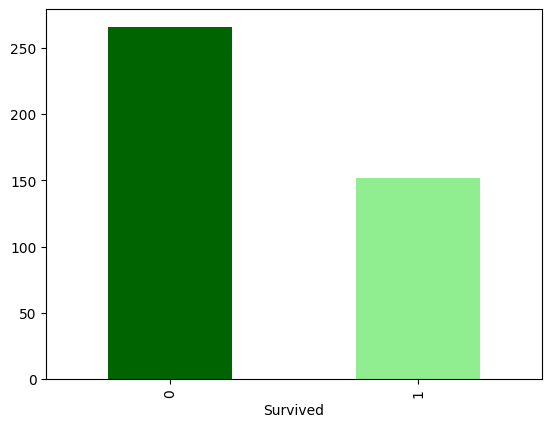

In [25]:
titanic["Survived"].value_counts().plot(kind="bar",color=["darkgreen","lightgreen"])

In [ ]:
#Pclass vs survived 

In [26]:
pd.crosstab(titanic.Survived,titanic.Pclass)

Pclass,1,2,3
Survived,,,
0,57,63,146
1,50,30,72


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

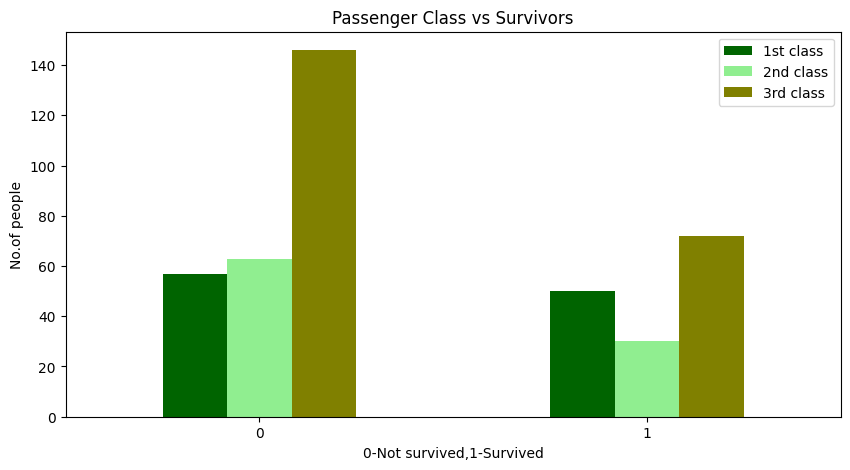

In [41]:
pd.crosstab(titanic.Survived,titanic.Pclass).plot(kind='bar',figsize=(10,5),color=['darkgreen','lightgreen','olive'])
plt.xlabel('0-Not survived,1-Survived')
plt.ylabel('No.of people')
plt.title("Passenger Class vs Survivors")
plt.legend(['1st class','2nd class','3rd class'])
plt.xticks(rotation=0)

In [51]:
titanic['Age'].mean()

30.272590361445783

In [31]:
#Survivors vs gender

titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [32]:
pd.crosstab(titanic.Sex,titanic.Survived)

Survived,0,1
Sex,,
female,0,152
male,266,0


In [33]:
titanic['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

Here we see a biased and impractical situation where we find that among the survivors none were 'Male' that is none of the men made it, on the other hand we can also see that all the females were able to survive.

But not much to be surprised of because as we saw in the film 'TITANIC' that the captain had strictly instructed that 'WOMEN and CHILDREN' first, jokes apart so now moving on

In [34]:
#convering the data of sex column into numerical values using LabelEncoder

In [35]:
labelencoder=LabelEncoder()

In [36]:
titanic['Sex']=labelencoder.fit_transform(titanic['Sex'])

In [37]:
titanic.head()   #0-Male,1-Female

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S


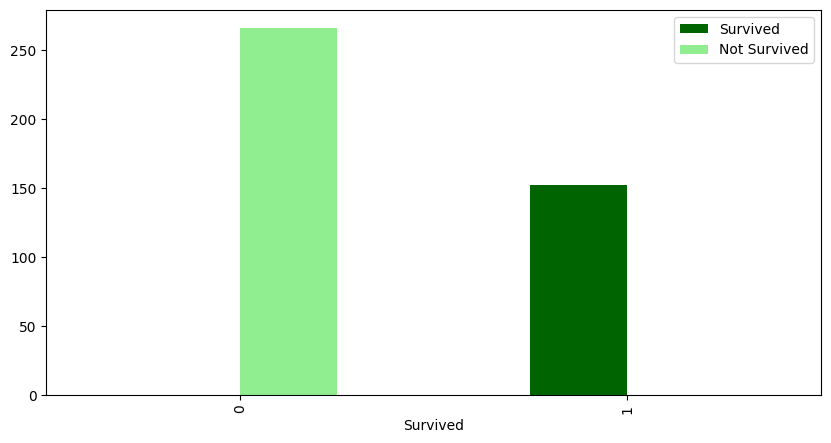

In [47]:
pd.crosstab(titanic.Survived,titanic.Sex).plot(kind='bar',figsize=(10,5),color=['darkgreen','lightgreen'])
plt.legend(['Survived','Not Survived'])


## 4- Model Construction

In [52]:
x=titanic[['Pclass','Sex']]
y=titanic['Survived']

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [54]:
x

,Pclass,Sex
0,3,1
1,3,0
2,2,1
3,3,1
4,3,0
...,...,...
413,3,1
414,1,0
415,3,1
416,3,1


In [55]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [56]:
x_train

,Pclass,Sex
20,1,1
306,1,1
142,1,1
14,1,0
284,3,0
...,...,...
323,1,1
192,3,1
117,3,0
47,3,1


While choosing the right machine learning model we should look between the following models

1>Logistic Regression

2>K-Nearest Neighbor

3>Random Forest Classifier

In [58]:
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}
def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [59]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 1.0, 'Logistic Regression': 1.0, 'Random Forest': 1.0}

Here we can clearly see that the prediction results for each of the three choosen machine learning model turns out to be completely accurate i.e 100%, so here we choose LogisticRegression as the preferred machine learning model?

In [60]:
#Choosing Logistic Regression as the preferred model first

log=LogisticRegression(random_state=0)
log.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [61]:
predict=print(log.predict(x_test))

[0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1
 1 0 0 1 0 1 0 1 0 0]


In [63]:
res=log.predict([[2,0]])
if(res==0):
    print('Not survived')
else:
    print('Survived')

Survived


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### So we have successfully built the appropriate machine learning model to predict the titanic survivors using the logistic regression model